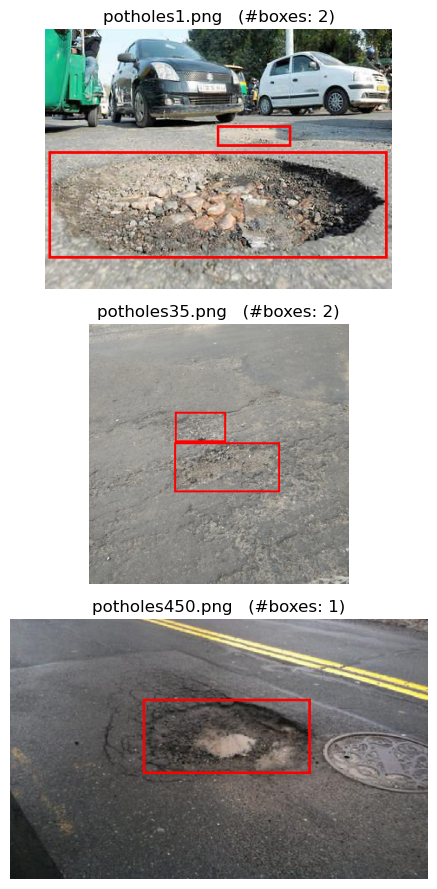

In [ ]:
from pathlib import Path
import json
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

DATA_ROOT = Path("/dtu/datasets1/02516/potholes")
IMG_DIR = DATA_ROOT / "images"
ANN_DIR = DATA_ROOT / "annotations"

NUM_EXAMPLES = 5

def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    boxes = []
    for obj in root.findall("object"):
        bnd = obj.find("bndbox")
        xmin = int(bnd.find("xmin").text)
        ymin = int(bnd.find("ymin").text)
        xmax = int(bnd.find("xmax").text)
        ymax = int(bnd.find("ymax").text)
        boxes.append((xmin, ymin, xmax, ymax))
    return boxes

'''
with open(DATA_ROOT / "splits.json", "r") as f:
    splits = json.load(f)

train_files = splits["train"]      # ["img1.jpg", "img2.jpg", ...]
train_files = train_files[:NUM_EXAMPLES]
'''
train_files = ["potholes1.png", "potholes35.png", "potholes450.png"]

plt.figure(figsize=(12, 3 * len(train_files)))

for i, fname in enumerate(train_files, start=1):
    img_path = IMG_DIR / fname
    xml_path = ANN_DIR / (Path(fname).stem + ".xml")

    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    boxes = parse_xml(xml_path)

    for (xmin, ymin, xmax, ymax) in boxes:
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=3)

    plt.subplot(len(train_files), 1, i)
    plt.imshow(img)
    plt.title(f"{fname}   (#boxes: {len(boxes)})")
    plt.axis("off")

plt.tight_layout()
plt.show()